In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color =sns.color_palette()


In [197]:
powers = pd.read_csv("super_hero_powers.csv")
heroes = pd.read_csv('heroes_information.csv')

In [198]:
print(heroes.shape)
print(powers.shape)

(734, 11)
(667, 168)


In [199]:
heroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [200]:
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [201]:
heroes.loc[heroes['name']=='Superman',['name','Alignment']]

,name,Alignment
646,Superman,good


In [202]:
heroes.Alignment.value_counts()

good       496
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64

In [203]:
heroes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [204]:
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [205]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [206]:
heroes.Publisher.isnull().sum()

15

In [207]:
heroes.replace(to_replace='-', value='unknown', inplace= True)

In [208]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [209]:
heroes.Publisher.isnull().sum()

15

In [210]:
heroes['Weight'].value_counts().head(3)

-99.0    237
 79.0     23
 54.0     23
Name: Weight, dtype: int64

In [211]:
heroes[heroes.Weight.isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,unknown,unknown,Kaiju,unknown,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,unknown,good,NaN


In [212]:
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,unknown,bad,-99.0


In [213]:
heroes.replace(-99.0, value=np.nan, inplace = True)

In [214]:
heroes.Weight.isnull().sum()

239

In [215]:
publisher_series = heroes['Publisher'].value_counts()

In [216]:
publisher_series.sum()

719

In [217]:
publisher_series.head(3)

Marvel Comics    388
DC Comics        215
NBC - Heroes      19
Name: Publisher, dtype: int64

In [218]:

publishers = list(publisher_series.index)
publications = list((publisher_series/publisher_series.sum())*100)


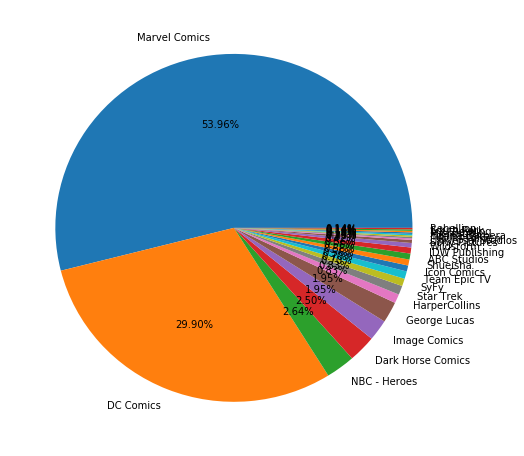

In [219]:
plt.pie(publications,labels=publishers,
       autopct='%1.2f%%')

# plt.figure(figsize=(5,18), dpi=100)

fig = plt.gcf()
fig.set_size_inches(8,8)

plt.show()


In [220]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected=True)

In [221]:
draw = go.Pie(labels=publishers, values=publications)

layout = go.Layout(
    title="%age of Publications by Publishers",
    height=650,
    width=650
)

data = [draw]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='publications-by-publishers')

In [222]:
heroes.Alignment.value_counts().index


Index(['good', 'bad', 'neutral', 'unknown'], dtype='object')

In [223]:

df = pd.DataFrame(columns=['Publishers','total-heroes','total-villans','total-neutral','total-unknown'])

for publisher in publishers:
    data = []
    data.append(publisher)
    data.append(len(heroes.loc[(heroes['Alignment']=='good') & (heroes['Publisher']==publisher), 'name']))
    data.append(len(heroes.loc[(heroes['Alignment']=='bad') & (heroes['Publisher']==publisher), 'name']))
    data.append(len(heroes.loc[(heroes['Alignment']=='neutral') & (heroes['Publisher']==publisher), 'name']))
    data.append(len(heroes.loc[(heroes['Alignment']=='unknown') & (heroes['Publisher']==publisher), 'name']))
    
    df.loc[len(df)] = data

In [224]:
df

,Publishers,total-heroes,total-villans,total-neutral,total-unknown
0,Marvel Comics,259,115,11,3
1,DC Comics,142,59,13,1
2,NBC - Heroes,16,3,0,0
3,Dark Horse Comics,12,6,0,0
4,Image Comics,2,11,0,1
5,George Lucas,8,6,0,0
6,HarperCollins,6,0,0,0
7,Star Trek,5,0,0,1
8,SyFy,5,0,0,0
9,Team Epic TV,4,1,0,0


In [225]:
df.iloc[0]

Publishers       Marvel Comics
total-heroes               259
total-villans              115
total-neutral               11
total-unknown                3
Name: 0, dtype: object

# plotting bar graph that gives info of character by their alignment for each publisher.

In [226]:


block1 = go.Bar(x = list(df['Publishers']),
    y = list(df['total-heroes']),
    name='total-heroes')

block2 = go.Bar(
    x = list(df['Publishers']),
    y = list(df['total-villans']),
    name='total-villans'
)

block3 = go.Bar(
    x = list(df['Publishers']),
    y = list(df['total-neutral']),
    name='total-neutral'
)

block4 = go.Bar(
    x = list(df['Publishers']),
    y = list(df['total-unknown']),
    name='total-unknown'
)

data_obj= [block1,block2,block3,block4]

layout = go.Layout(
            title= "count of characters by alignment",
            barmode='group')
fig = go.Figure(data=data_obj,layout=layout)
py.iplot(fig, filename="bargraph")

# Gender wise distribution of comic characters


In [227]:
gender_series=heroes['Gender'].value_counts()
gender_series


Male       505
Female     200
unknown     29
Name: Gender, dtype: int64

In [228]:
genders=list(gender_series.index)
genders

['Male', 'Female', 'unknown']

In [229]:
distribution = list((gender_series/gender_series.sum())*100)

In [230]:
distribution

[68.80108991825612, 27.247956403269757, 3.9509536784741144]

In [231]:
gender_data = go.Pie(labels=genders, values=distribution)
gender_data = [gender_data]

Layout=go.Layout(
            title='GEnder wise distribution',
            height =500,
            width= 500)

fig = go.Figure(data=gender_data, layout=Layout)
py.iplot(fig, filename='Gender wise distribution of comic character')

# Gender distribution by Alignment

In [232]:
heroes_gender_series = heroes['Gender'].loc[heroes['Alignment']=='good'].value_counts()
heroes_genders = list(heroes_gender_series.index)
heroes_distribution = list((heroes_gender_series/heroes_gender_series.sum())*100)

villans_gender_series = heroes['Gender'].loc[heroes['Alignment']=='bad'].value_counts()
villans_genders = list(villans_gender_series.index)
villans_distribution = list((villans_gender_series/villans_gender_series.sum())*100)

neutral_gender_series = heroes['Gender'].loc[heroes['Alignment']=='neutral'].value_counts()
neutral_genders = list(neutral_gender_series.index)
neutral_distribution = list((neutral_gender_series/neutral_gender_series.sum())*100)

unknown_gender_series = heroes['Gender'].loc[heroes['Alignment']=='unknown'].value_counts()
unknown_genders = list(unknown_gender_series.index)
unknown_distribution = list((unknown_gender_series/unknown_gender_series.sum())*100)

In [233]:
fig = {
    "data":[
        {
            "labels": heroes_genders,
            "values": heroes_distribution,
            "type": "pie",
            "hole": 0.4,
            "name": "heroes",
            "domain": {"row": 0, "column": 0}
        },
        {
            "labels": villans_genders,
            "values": villans_distribution,
            "type": "pie",
            "hole": 0.4,
            "name": "villans",
            "domain": {"row": 0, "column": 1}
        },
        {
            "labels": neutral_genders,
            "values": neutral_distribution,
            "type": "pie",
            "hole": 0.4,
            "name": "neutral",
            "domain": {"row": 1, "column": 0}
        },
        {
            "labels": unknown_genders,
            "values": unknown_distribution,
            "type": "pie",
            "hole": 0.4,
            "name": "unknown",
            "domain": {"row": 1, "column": 1}
        }
    ],
    
    "layout": {
        "title":"Gender distribution by Alignment",
        "grid": {"rows" : 2, "columns": 2},
        "annotations": [
            {"text": "Heroes", "x": 0.19, "y":0.8, "showarrow": False},
            {"text": "Villans", "x":0.82, "y": 0.77, "showarrow":False},
            {"text": "Neutrals", "x": 0.19, "y": 0.2, "showarrow": False},
            {"text": "Unknowns", "x": 0.83, "y": 0.19, "showarrow": False}
        ],
        "height": 650,
        "width": 650
    }
}

py.iplot(fig, filename="gender by alignent")

# most  powerfull super heroes

In [234]:
powers= pd.read_csv('super_hero_powers.csv')

In [235]:
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [236]:
powers.shape

(667, 168)

In [237]:
powers= powers*1
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
powers.loc[:,'total_powers'] = powers.iloc[:, 1:].sum(axis=1)

In [239]:
powers[['hero_names','total_powers']].head(10)

,hero_names,total_powers
0,3-D Man,4
1,A-Bomb,7
2,Abe Sapien,16
3,Abin Sur,1
4,Abomination,8
5,Abraxas,14
6,Absorbing Man,11
7,Adam Monroe,3
8,Adam Strange,10
9,Agent Bob,1


In [251]:
top_10=powers.sort_values(by='total_powers', ascending = False).head(10)
top_10

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total_powers
563,Spectre,1,1,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,49
18,Amazo,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,44
394,Martian Manhunter,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,35
370,Living Tribunal,1,1,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,35
388,Man of Miracles,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,34
139,Captain Marvel,1,1,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,33
597,T-X,1,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,33
246,Galactus,0,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,32
594,T-1000,1,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,32
455,One-Above-All,1,1,0,1,0,1,0,1,1,...,1,0,0,0,0,0,0,1,1,31


In [252]:
top_10=top_10[['hero_names','total_powers']].head(10)
top_10

,hero_names,total_powers
563,Spectre,49
18,Amazo,44
394,Martian Manhunter,35
370,Living Tribunal,35
388,Man of Miracles,34
139,Captain Marvel,33
597,T-X,33
246,Galactus,32
594,T-1000,32
455,One-Above-All,31


In [253]:
trace = go.Bar(
    x=top_10['hero_names'],
    y=top_10['total_powers'],
    text = ['names','total_powers']
)

layout = go.Layout(
    title = "comic character by total powers they have"
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="most powerful superhero")